In [1]:
import numpy as np
import pandas as pd
from PIL import Image
df_can=pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                    skiprows=range(20),
                    skipfooter=2,
                    usecols='A:AQ')
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [2]:
pd.set_option('display.max.columns', None)

In [3]:
df_can.shape

(195, 43)

In [4]:
df_can.drop(['Type','Coverage','AREA','REG','DEV','DevName'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country',
                       'AreaName':'Continent',
                      'RegName':'Region'}, inplace=True)
df_can.columns=list(map(str,df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total']=df_can.sum(axis=1)
years=list(map(str,range(1980,2014)))
df_can.shape

(195, 37)

In [5]:
df_can.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [6]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 

mpl.style.use('ggplot')
print('Matplotlib version : ', mpl.__version__)

Matplotlib version :  3.3.4


In [7]:
df_dsn=df_can.loc[['Denmark','Norway','Sweden'], :]
df_dsn

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866


In [9]:
total_values=sum(df_dsn['Total'])
category_proportions=[(float(value)/total_values) for value in df_dsn['Total']]
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


In [11]:
width=40
height=10
total_num_tiles=width*height
print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


In [12]:
tiles_per_category=[round(proportion*total_num_tiles) for proportion in category_proportions]
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i]+':'+str(tiles))

Denmark:129
Norway:77
Sweden:194


In [14]:
waffle_chart=np.zeros((height,width))
category_index=0
tile_index=0
for col in range(width):
    for row in range(height):
        tile_index+=1
        if tile_index>sum(tiles_per_category[0:category_index]):
            category_index+=1
        waffle_chart[row, col]=category_index

    

In [15]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

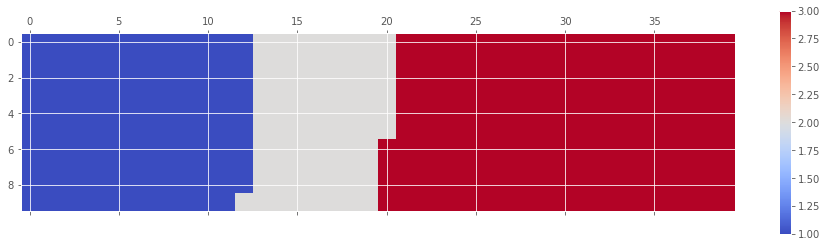

In [16]:
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

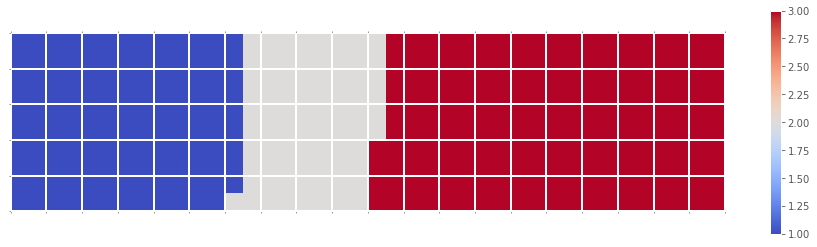

In [24]:
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
ax=plt.gca()
ax.set_xticks(np.arange(-.5,(width),2), minor=True)
ax.set_yticks(np.arange(-.5,(height),2), minor=True)
ax.grid(which='minor',color='w',linestyle='-',linewidth=2)
plt.xticks([])
plt.yticks([])


In [38]:
def create_waffle_chart(categories, values, height,
                        width, colormap, value_sign=''):
    total_values=sum(values)
    category_proportions=[(float(value)/total_values) for value in values]
    total_num_tiles=width*height 
    print('Total number of tiles is', total_num_tiles)
    
    tiles_per_category=[round(proportion*total_num_tiles) for proportion in category_proportions]
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i] + ':' + str(tiles))
        
    waffle_chart=np.zeros((height,width))
    category_index=0
    tile_index=0
    
    for col in range(width):
        for row in range(height):
            tile_index+=1
            
            if tile_index> sum(tiles_per_category[0:category_index]):
                category_index+=1
            waffle_chart[row,col]=category_index
    fig=plt.figure()
    colormap=plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()
            
    ax=plt.gca()
            
    ax.set_xticks(np.arange(-.5,(width), 1), minor=True)
    ax.set_yticks(np.arange(-.5,(height),1), minor=True)
    ax.grid(which='minor', color='w',linestyle='-', linewidth=2)
            
    plt.xticks([])
    plt.yticks([])
            
    values_cumsum=np.cumsum(values)
    total_values=values_cumsum[len(values_cumsum)-1]
    legend_handles=[]
    for i, category in enumerate(categories):
        if value_sign=='%':
            label_str=category + '('+value_sign+')'
        else:
            label_str=category + '('+value_sign+str(values[i])+')'
            color_val=colormap(float(values_cumsum[i])/total_values)
                
    legend_handles.append(mpatches.Patch(color=color_val,
                                         label=label_str))
    plt.legend(handles=legend_handles,
               loc='lower center',
               ncol=len(categories),
               bbox_to_anchor=(0.,-0.2,0.95,.1))
                

In [39]:
width=40
height=10
categories=df_dsn.index.values
values=df_dsn['Total']
colormap=plt.cm.coolwarm

Total number of tiles is 400
Denmark:129
Norway:77
Sweden:194


<Figure size 432x288 with 0 Axes>

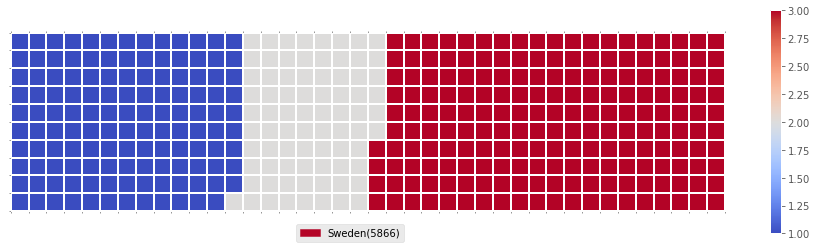

In [40]:
create_waffle_chart(categories, values, height, width, colormap)

In [42]:
from wordcloud import WordCloud, STOPWORDS

In [49]:
#python -m wget https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -o alice_novel.txt
alice_novel=open('alice_novel.txt','r').read()

In [50]:
stopwords=set(STOPWORDS)

In [55]:
alice_wc=WordCloud(background_color='white',
                  max_words=2000,
                   stopwords=stopwords)
alice_wc.generate(alice_novel)

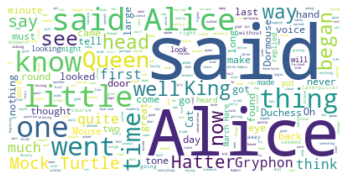

In [59]:
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

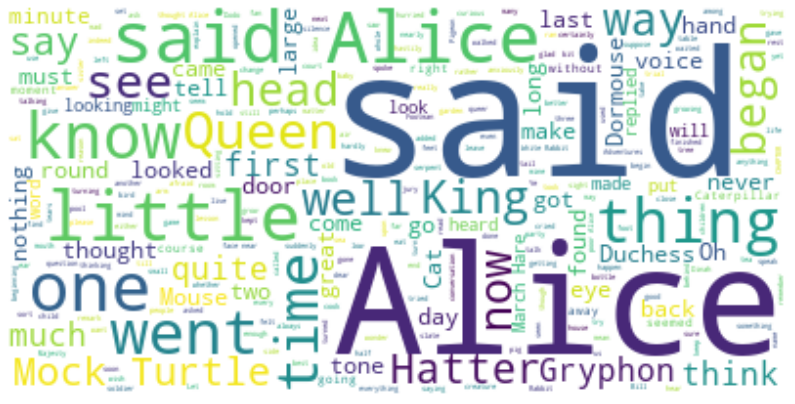

In [60]:
#melihat kata-kata yang jarang digunakan
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

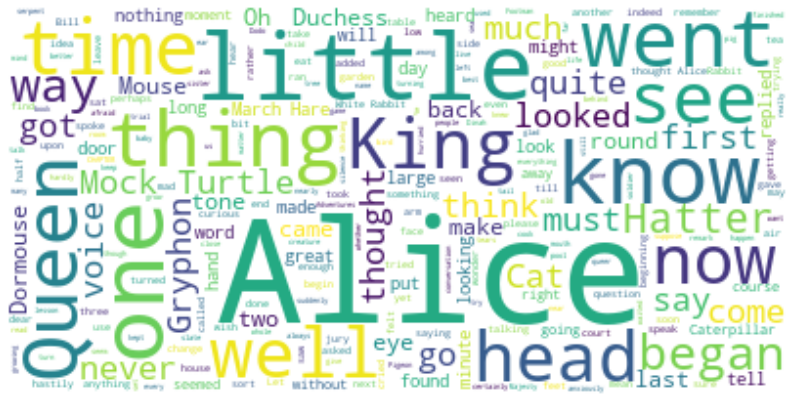

In [61]:
#mengecualikan kata yang tidak informatif
stopwords.add('said')
alice_wc.generate(alice_novel)
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
alice_mask=np.array(Image.open('alice_mask.png'))

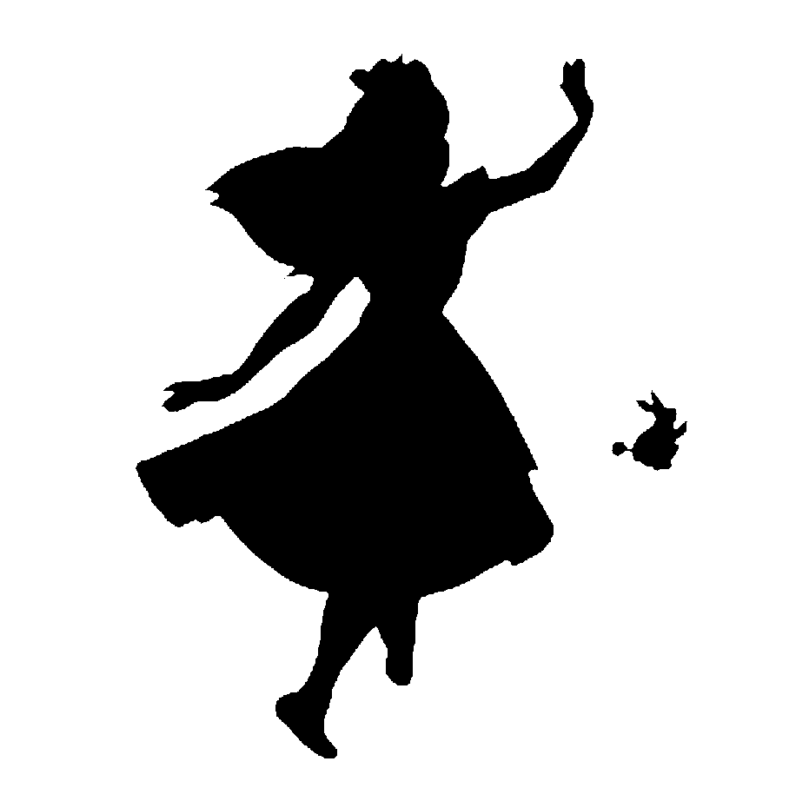

In [63]:
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray,
          interpolation='bilinear')
plt.axis('off')
plt.show()

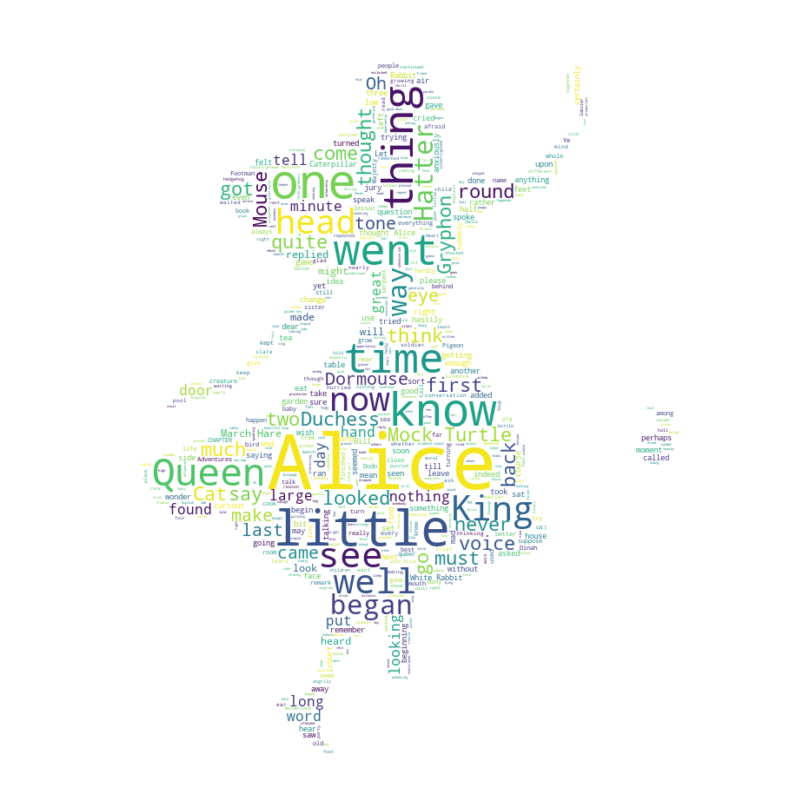

In [64]:
alice_wc=WordCloud(background_color='white',
                  max_words=2000, mask=alice_mask,
                  stopwords=stopwords)
alice_wc.generate(alice_novel)

fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [66]:
df_can.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [71]:
total_immigration=df_can['Total'].sum()
total_immigration

6409153

In [72]:
#menampilkan negara-negara yang paling besar berkontribusi
#terhadap total imigrasi
max_words=90
word_string=''
for country in df_can.index.values:
    if len(country.split(' '))==1:
        repeat_num_times=int(df_can.loc[country,'Total']/
                            float(total_immigration)*max_words)
        word_string=word_string+((country+' ')*repeat_num_times)
word_string
    

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [73]:
wordcloud=WordCloud(background_color='white').generate(word_string)

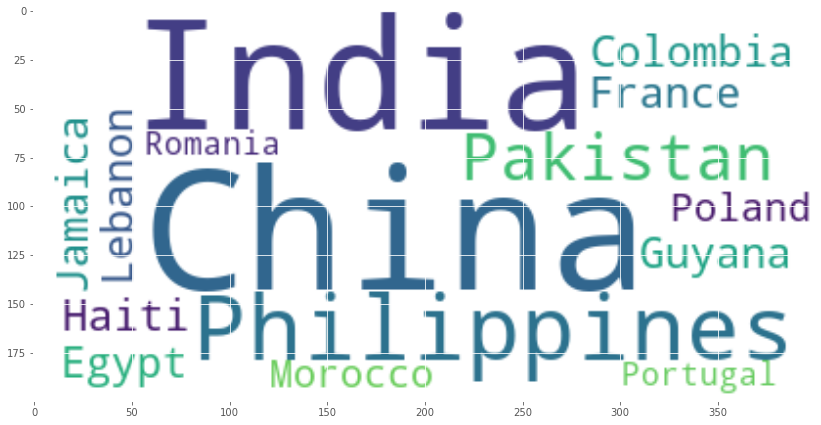

In [74]:
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [75]:
import seaborn as sns

In [77]:
df_tot=pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index=map(float,df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns=['year','total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


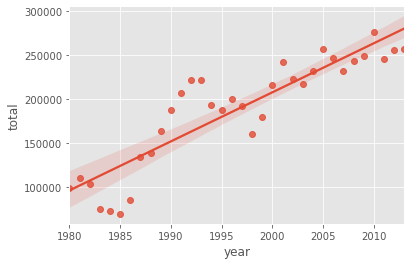

In [78]:
import seaborn as sns
ax=sns.regplot(x='year',y='total', data=df_tot)

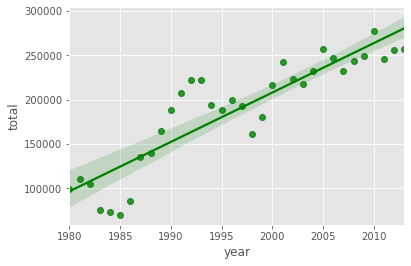

In [79]:
ax=sns.regplot(x='year', y='total', data=df_tot, color='green')

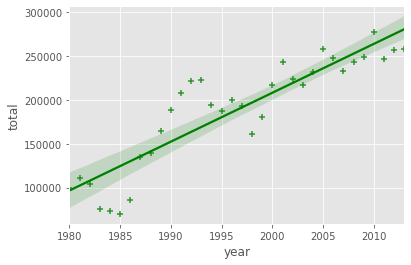

In [83]:
ax=sns.regplot(x='year', y='total', data=df_tot,
              color='green', marker='+')

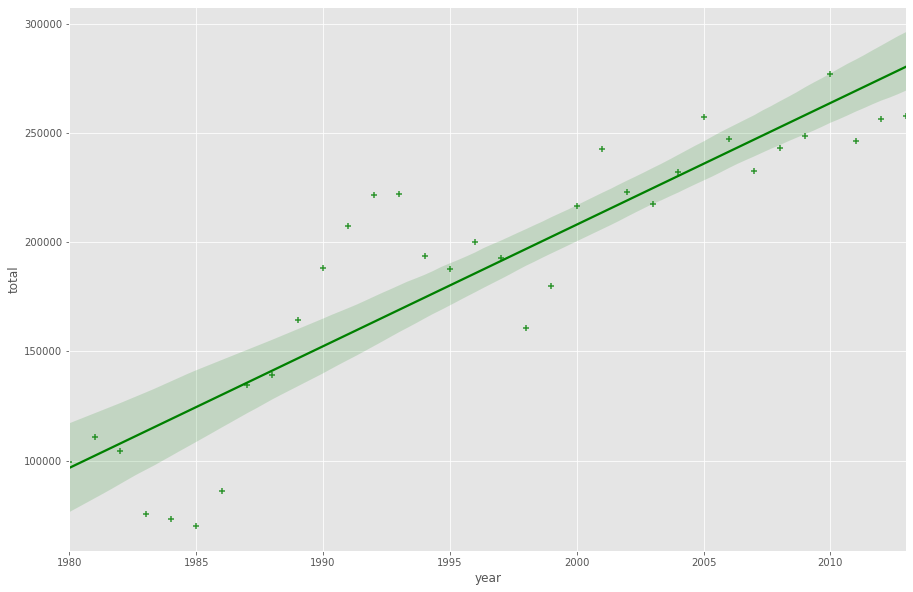

In [84]:
plt.figure(figsize=(15,10))
ax=sns.regplot(x='year',y='total', data=df_tot,
              color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

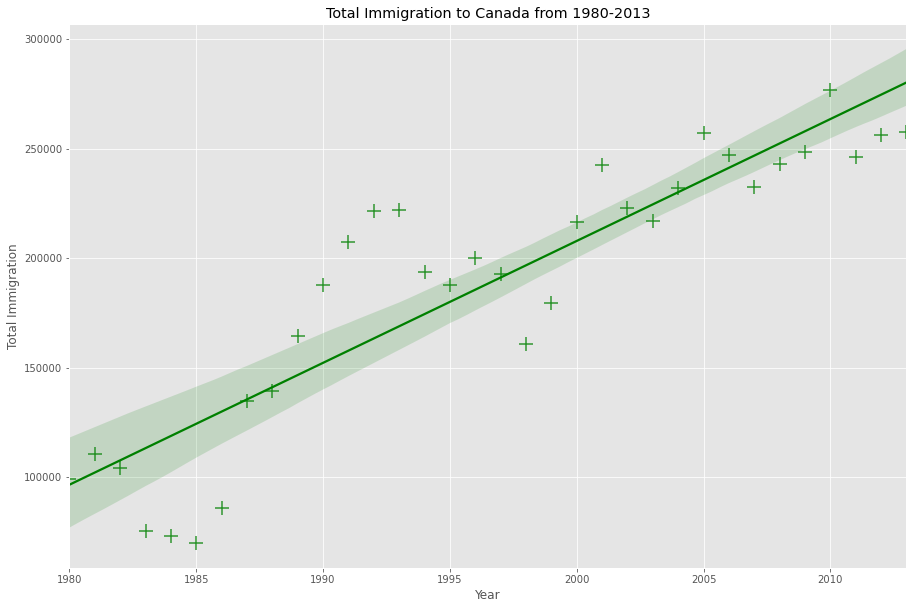

In [85]:
plt.figure(figsize=(15,10))
ax=sns.regplot(x='year', y='total', data=df_tot,
              color='green',marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

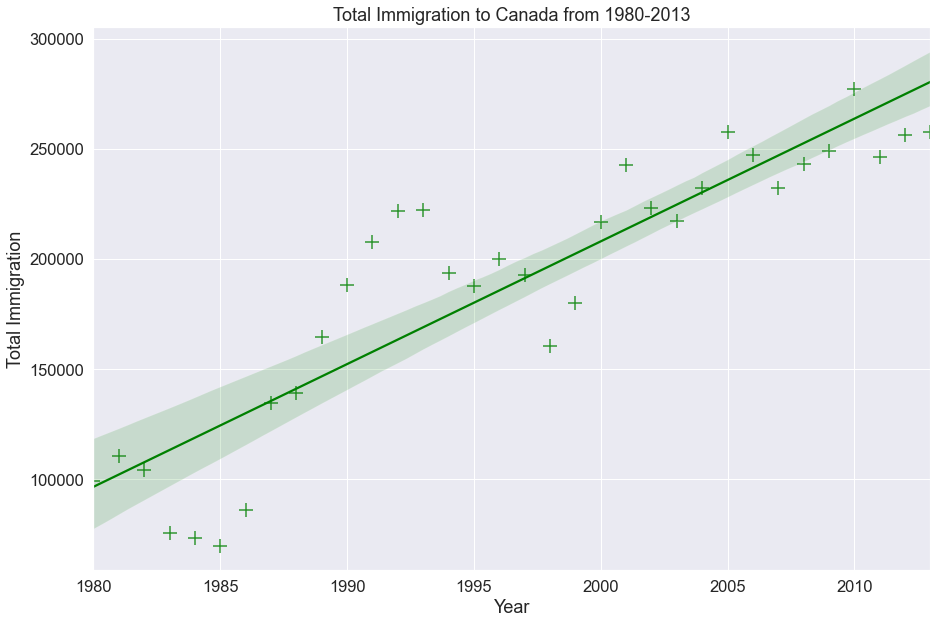

In [86]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
ax=sns.regplot(x='year', y='total', data=df_tot,
              color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')


Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

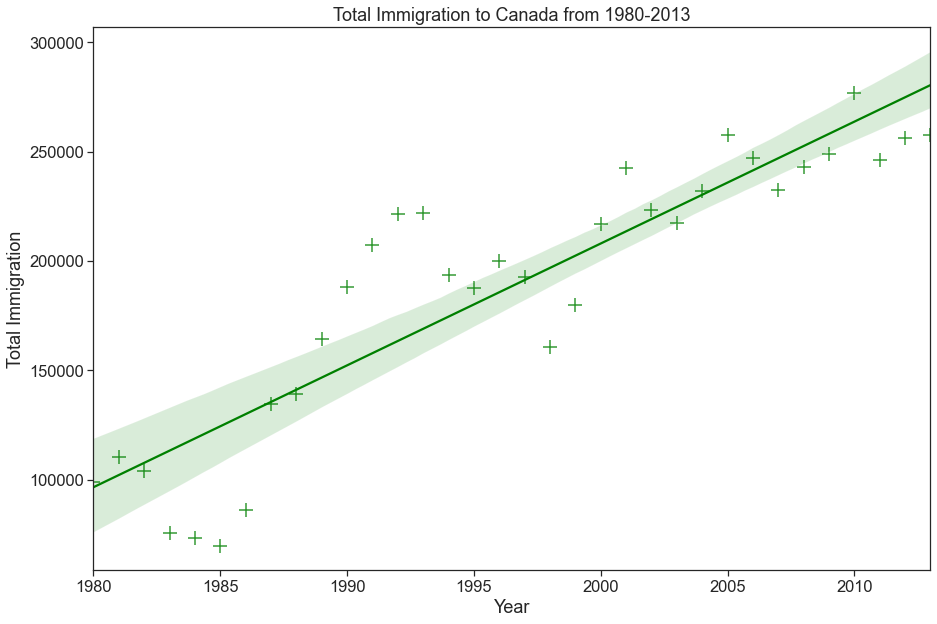

In [87]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('ticks')
ax=sns.regplot(x='year', y='total', data=df_tot,
              color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')


Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

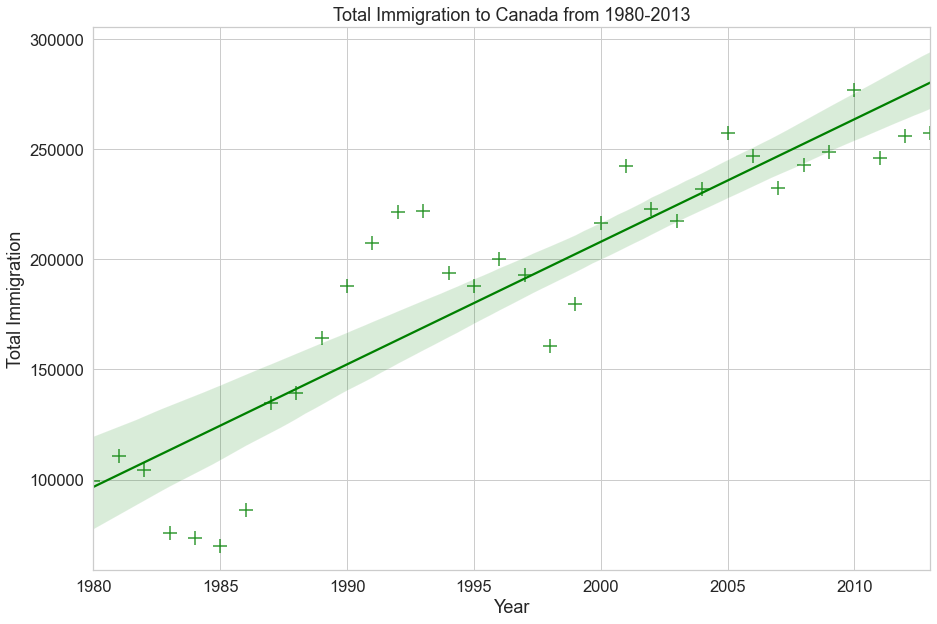

In [88]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax=sns.regplot(x='year', y='total', data=df_tot,
              color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')


Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980-2013')

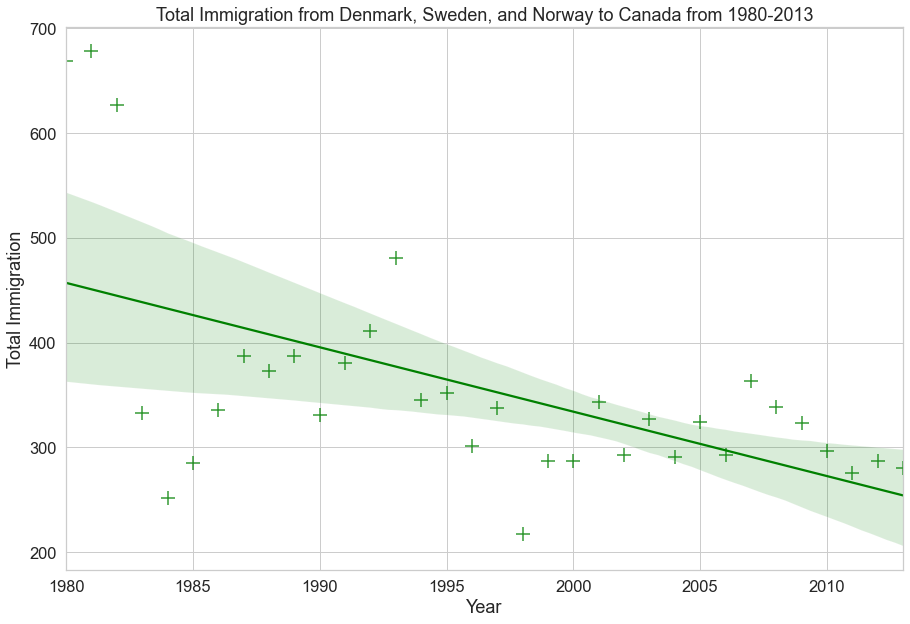

In [91]:
df_countries=df_can.loc[['Denmark','Sweden','Norway'], years].transpose()
df_total=pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns=['year','total']
df_total['year']=df_total['year'].astype(int)
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax=sns.regplot(x='year',y='total',data=df_total,
              color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980-2013')

In [92]:
import numpy as np
import pandas as pd

In [94]:
import folium
world_map=folium.Map()
world_map

In [95]:
world_map=folium.Map(location=[-6.992620,110.428009],
                    zoom_start=8)
world_map

In [98]:
world_map=folium.Map(location=[-6.992620,110.428009],
                    zoom_start=13)
world_map

In [99]:
world_map=folium.Map(location=[-6.2607187, 106.7794275],
                    zoom_start=15)
world_map

In [101]:
#stamen toner map
world_map=folium.Map(location=[-6.9902851,110.4207485],
                    zoom_start=13, tiles='Stamen Toner')
world_map

In [102]:
#stamen terain maps
world_map=folium.Map(location=[-6.9902851,110.4207485],
                    zoom_start=13, tiles='Stamen Terrain')
world_map

In [103]:
df_incidents= pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [104]:
df_incidents.shape

(150500, 13)

In [105]:
#membatasi hanya 100 data kejahatan pertama
df_incidents=df_incidents.iloc[0:100,:]
df_incidents.shape

(100, 13)

In [106]:
#latitude and longitude values of San Fransisco
latitude=37.7
longitude=-122.42
#create map
sanfran_map=folium.Map(location=[latitude, longitude],
                      zoom_start=12)
sanfran_map

In [107]:
incidents=folium.map.FeatureGroup()
for lat, lng in zip(df_incidents.Y,df_incidents.X):
    incidents.add_child( folium.CircleMarker(
    [lat,lng],
    radius=5,
    color='yellow',
    fill=True,
    fill_color='blue',
    fill_opacity=0.6))
sanfran_map.add_child(incidents)

In [109]:
#menmbahkan teks pop-up pada circle yang telah dibuat
incidents=folium.map.FeatureGroup()
for lat,lng in zip(df_incidents.Y,df_incidents.X):
    incidents.add_child(folium.CircleMarker(
    [lat,lng],
    radius=5,
    color='yellow',
    fill=True,
    fill_color='blue',
    fill_opacity=0.6))
    
latitudes=list(df_incidents.Y)
longitudes=list(df_incidents.X)
labels=list(df_incidents.Category)

for lat,lng, label in zip(latitudes,longitudes, labels):
    folium.Marker([lat,lng],
                 popup=label).add_to(sanfran_map)
sanfran_map.add_child(incidents)


In [110]:
latitude=37.7
longitude=-122.42
sanfran_map=folium.Map(location=[latitude,longitude],
                      zoom_start=12)
for lat,lng, label in zip(df_incidents.Y,df_incidents.X,
                         df_incidents.Category):
    folium.CircleMarker([lat,lng],
                       radius=5,
                       color='yellow',
                       fill=True,
                       fill_color='blue',
                       fill_opacity=0.6,
                       popup=label).add_to(sanfran_map)
sanfran_map

In [111]:
latitude=37.7
longitude=-122.42
from folium import plugins
sanfran_map=folium.Map(location=[latitude, longitude],
                      zoom_start=12)
incidents=plugins.MarkerCluster().add_to(sanfran_map)

for lat,lng,label in zip(df_incidents.Y,df_incidents.X,
                        df_incidents.Category):
    folium.Marker(
    location=[lat,lng],
    icon=None,
    popup=label).add_to(incidents)
sanfran_map

In [127]:
df_can=pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                    skipfooter=2,usecols='A:AQ')
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [128]:
df_can.shape

(195, 43)

In [129]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1,
           inplace=True)
df_can.rename(columns={'OdName':'Country',
                      'AreaName': 'Continent',
                      'RegName':'Region'}, inplace=True)


In [130]:
df_can.shape

(195, 38)

In [138]:
df_can.set_index(['Country'], inplace=True)

In [140]:
df_can['Total']=df_can.sum(axis=1)

In [143]:
years=range(1980,2014)
df_dsn=df_can.loc[['Denmark','Sweden','Norway'],years]
df_dsn.head(3)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81
Sweden,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140
Norway,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59


In [144]:
df_dsn['Total']=df_dsn.sum(axis=1)

In [146]:
total_for_dsn=sum(df_dsn['Total'])

In [147]:
country_proportions=[(float(value)/total_for_dsn) for value in df_dsn['Total']]
for i, proportion in enumerate(country_proportions):
    print (df_dsn.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Sweden:0.48503390110798744
Norway:0.1924094592359848


In [148]:
total_for_dsn

12094

In [150]:
width, height=(50,10)
total_tiles=width*height
total_tiles

500

In [152]:
tiles_per_country=[round(propor*total_tiles) for propor in country_proportions]
tiles_per_country

[161, 243, 96]

In [153]:
nilai=[2,3,4,5,6]
kuadrat=[i**2 for i in nilai ]
kuadrat

[4, 9, 16, 25, 36]

In [165]:
waffle_chart=np.zeros((height,width))
tile_index=0
country_index=0
for col in range(width):
    for row in range(height):
        tile_index+=1
        if tile_index>sum(tiles_per_country[0:country_index]):
              country_index+=1
        waffle_chart[row,col]=country_index
  
        
        
waffle_chart        

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

<Figure size 432x288 with 0 Axes>

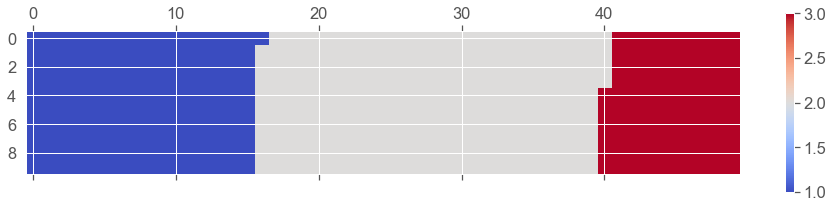

In [170]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use('ggplot')
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

<Figure size 432x288 with 0 Axes>

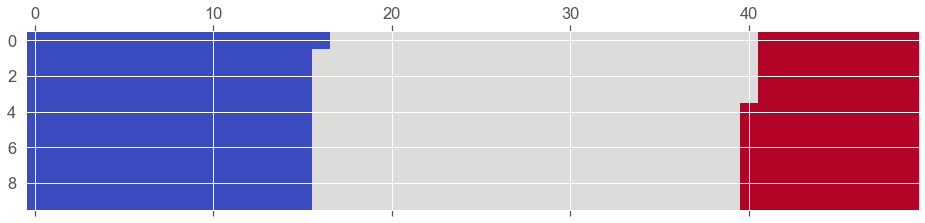

In [171]:
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
ax=plt.gca()
ax.set_xticks(np.arange(-.5,width,1), minor=True)
ax.set_yticks(np.arange(-.5,height,1), minor=True)
plt.matshow(waffle_chart, cmap=colormap)


In [172]:
import requests
url = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt'
r = requests.get(url, allow_redirects=True)
open('alice.txt', 'wb').write(r.content)

145192

In [175]:
alice_novel=open('alice.txt','r').read()